<a href="https://colab.research.google.com/github/Temple2001/ML_practice/blob/main/codes/IMDB_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
import numpy as np
keras.__version__

'2.5.0'

In [2]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the nda

In [7]:
def vectorize_sequences(sequences, dimension=10000):
    # 크기가 (len(sequences), dimension))이고 모든 원소가 0인 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    print (results.shape)
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # results[i]에서 특정 인덱스의 위치를 1로 만듭니다
    return results

In [8]:
# 훈련 데이터를 벡터로 변환하기
x_train = vectorize_sequences(train_data)
# 테스트 데이터를 벡터로 변환하기
x_test = vectorize_sequences(test_data)

(25000, 10000)
(25000, 10000)


In [12]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

y_train[0]

array([0., 1.], dtype=float32)

In [13]:
# Data split
x_val = x_train[:1000]
y_val = y_train[:1000]

partial_x_train = x_train[1000:]
partial_y_train = y_train[1000:]

print(x_val.shape, y_val.shape, partial_x_train.shape, partial_y_train.shape)

(1000, 10000) (1000, 2) (24000, 10000) (24000, 2)


In [14]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

1654784/1641221 [==============================] - 0s 0us/step


In [15]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [16]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(10, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(2, activation='softmax'))

In [17]:
# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
# 모델 훈련 및 history 저장
history = model.fit(partial_x_train, partial_y_train, batch_size=100, epochs=10, validation_data=(x_val, y_val), shuffle=True)

history_dict = history.history
history_dict.keys()

Epoch 1/10
240/240 [==============================] - 18s 14ms/step - loss: 0.4893 - accuracy: 0.7653 - val_loss: 0.2682 - val_accuracy: 0.8880
Epoch 2/10
240/240 [==============================] - 3s 12ms/step - loss: 0.2209 - accuracy: 0.9200 - val_loss: 0.2528 - val_accuracy: 0.8900
Epoch 3/10
240/240 [==============================] - 3s 12ms/step - loss: 0.1660 - accuracy: 0.9439 - val_loss: 0.2598 - val_accuracy: 0.8920
Epoch 4/10
240/240 [==============================] - 3s 12ms/step - loss: 0.1325 - accuracy: 0.9552 - val_loss: 0.2727 - val_accuracy: 0.8890
Epoch 5/10
240/240 [==============================] - 3s 12ms/step - loss: 0.1021 - accuracy: 0.9677 - val_loss: 0.2955 - val_accuracy: 0.8880
Epoch 6/10
240/240 [==============================] - 3s 12ms/step - loss: 0.0775 - accuracy: 0.9770 - val_loss: 0.3261 - val_accuracy: 0.8820
Epoch 7/10
240/240 [==============================] - 3s 12ms/step - loss: 0.0611 - accuracy: 0.9836 - val_loss: 0.3791 - val_accuracy: 0.882

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

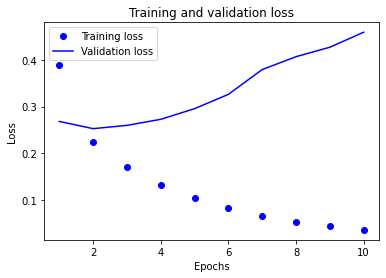

In [19]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# ‘b’는 파란색 실선을 의미합니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

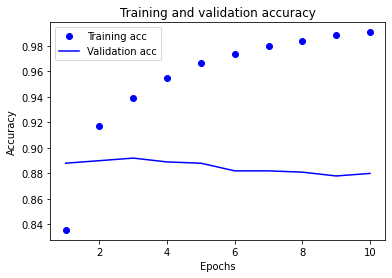

In [20]:
plt.clf()   # 그래프를 초기화합니다
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [21]:
result = model.predict(x_test)

result

array([[9.8404413e-01, 1.5955912e-02],
       [2.3034802e-07, 9.9999976e-01],
       [9.9469912e-01, 5.3008413e-03],
       ...,
       [9.9514455e-01, 4.8554032e-03],
       [9.9827588e-01, 1.7241794e-03],
       [2.0958851e-01, 7.9041147e-01]], dtype=float32)